Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [ ]:
NAME = "Raiyan Zakir Ayiman"
ID = "23301211"
SECTION = "24"

---

# CSE330 Lab: Polynomial Interpolation using Lagrange Form
---

### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### The Lagrange_Polynomial class
General form of an $n$ degree Lagrange polynomial:

\begin{equation}
p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x) = \sum_{k=0}^{n} y_kl_k(x),\tag{1}
\end{equation}

where
\begin{equation}
l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j}. \tag{2}
\end{equation}

Note that the Lagrange method is more efficient than the matrix method because *we do not need to calculate any inverse matrices*.

## 1. **The constructor `__init__(self, data_x, data_y)` is written for you.**

Here, we check whether the input vectors (numpy arrays) are equal or not.
We store `data_x` and `data_y`
We calculate and store the degree of the polynomial.
$$\$$

## 2. **The `_repr__(self)` function has been written for you.**

This is similar to the `toString()` method in Java. This returns a formatted string of the object whenever the object is printed.
$$\$$

## 3. **You have to implement the `l(self, k, x)` function. - 2 Marks**
This function would take `k` and `x` as inputs and calculate the Lagrange basis using the Equation $(2)$.


## 4. **You have to implement the `__call__(self, x_arr)` function. - 2 Marks**
This function makes an object of a class callable.
The function calculates the lagrange polynomial from a set of given nodes. `self.data_x` and `self.data_y` contains the coordinates of the given nodes of the original function. Using Equation $(1)$, you have to use `self.data_x`, `self.data_y`, and the `l(k, x_k, x)` function to find the interpolated output of the polynomial for all elements of `x_arr`.
`x_arr` is a numpy array containing points through which we want to plot our polynomial.

In [ ]:
class Lagrange_Polynomial:
    def __init__(self, data_x, data_y):
        self.data_x = data_x
        self.data_y = data_y

        self.degree = len(data_x) - 1

    def __repr__(self):
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(len(self.data_y)):
            if self.data_y[i] == 0:
                continue
            elif self.data_y[i] >= 0:
                strL += f"+ {self.data_y[i]}*l_{i}(x) "
            else:
                strL += f"- {-self.data_y[i]}*l_{i}(x) "

        return strL

    def l(self, k, x):
        l_k = 1.0
        for j in range(self.degree + 1):
            if j == k:
                continue
            l_k *=  (x-self.data_x[j]) / (self.data_x[k] - self.data_x[j])
        return l_k


    def __call__(self, x_arr):
        p_x_arr  = np.zeros(len(x_arr))
        for i in range(len(x_arr)):
            p_x_arr[i] = 0
            for j in range(self.degree+1):
                p_x_arr[i] += (self.data_y[j] * self.l(j, x_arr[i]))

        return p_x_arr

### Calling the Lagrange Polynomial object and plotting the polynomial.



*Note that in the plot the given nodes will be marked in red.*

In [ ]:
import numpy as np

LagrangePolynomial of order 6
p(x) = + 4.0*l_0(x) + 1.193*l_1(x) + 6.156*l_2(x) + 2.0*l_3(x) + 1.803*l_4(x) + 2.558*l_5(x) 


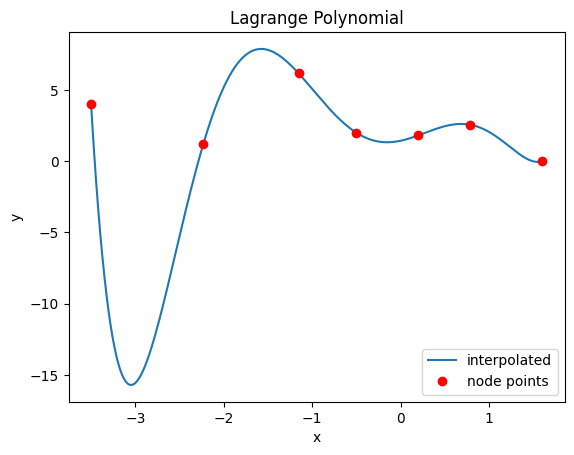

In [ ]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange_Polynomial(data_x, data_y)
print(p) # __repr__()

#generating 40 points from -3.5 to 1.6 in order to create a smooth line
x_arr = np.linspace(-3.5, 1.6, 1000) #test data--> determine the value of y from it
p_x_arr = p(x_arr) #__call__()

# plot to see if your implementation is correct
#google the functions to understand what each parameters mean, if not apparent
plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

plt.show()


# Daily Evaluation - 4 marks

In [ ]:
import math
data_x = [0, math.pi/2, math.pi]
data_y = [0, 1, 0]
p = Lagrange_Polynomial(data_x, data_y)
x_arr = np.linspace(0,math.pi, 10)
p_x_arr = p(x_arr)
sum = 0
print("--------------------------------")
print("INTERPOLATION ERRORS:\n")
for i in range(len(p_x_arr)):
    error = abs(np.sin(x_arr[i]) - p_x_arr[i])
    print("Interpolation Error:", error)
    sum += error
print("--------------------------------")
print("Average Interpolation Error:", sum/len(p_x_arr))

--------------------------------
INTERPOLATION ERRORS:

Interpolation Error: 0.0
Interpolation Error: 0.053041585069392994
Interpolation Error: 0.048570415004818734
Interpolation Error: 0.022863485104450354
Interpolation Error: 0.002846567975446246
Interpolation Error: 0.002846567975446246
Interpolation Error: 0.022863485104450243
Interpolation Error: 0.048570415004818734
Interpolation Error: 0.05304158506939288
Interpolation Error: 1.2246467991473532e-16
--------------------------------
Average Interpolation Error: 0.025464410630821655
